<h1 style = "text-decoration: underline; margin:10px 0 20px 0"> Project 7 - Analysis 2</h1>


It takes 30 - 45 minutes the run this project from top to bottom. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# This is the downloaded CSV file. Load it in.
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")

# Create DF and set last column to solution.
df = pd.DataFrame(mnist_csv)
df.columns = [*df.columns[:-1], "solution"]

# Split into features and target
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state = 1)

### Question 1:

<ul>
  <li>Preprocess the data</li>
  <li>Visualize one element from each class</li>
  <li>Visualize the mean of each class</li>
</ul>

In [2]:
df.head()

0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  solution  
0  0.0  0.0  0.0  0.0  0.0       0.0  
1  0.0  0.0  0.0  0.0  0.0       5.0  
2  0.0  0.0  0.0  0.0  0.0       3.0  
3  0.0  0.0  0.0  0.0  0.0       7.0  
4  0.0  0.0  0.0  0.0  0.0       8.0  

[5 rows x 785 columns]

In [3]:
df.shape

(35000, 785)

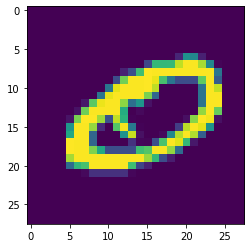

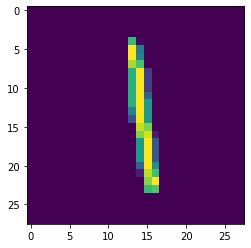

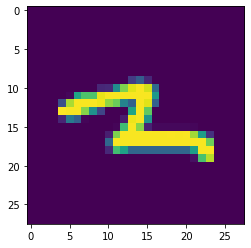

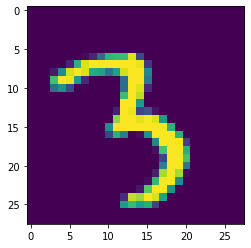

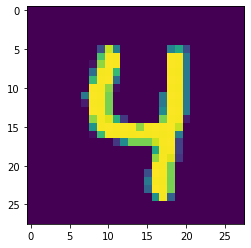

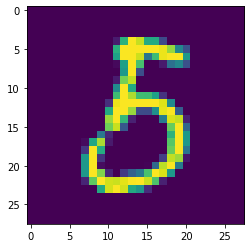

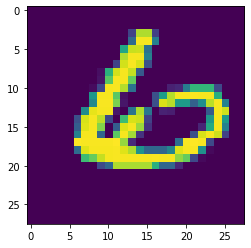

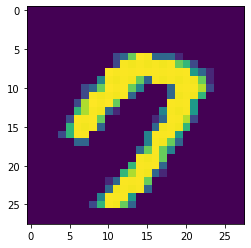

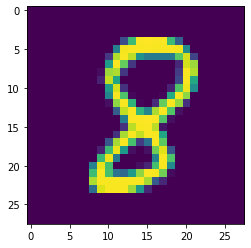

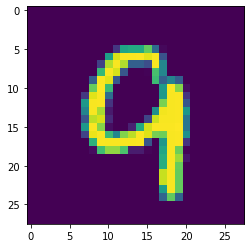

In [4]:
# Printin each of the images

# create a list of unique values from the solutions column
unique = df['solution'].unique()
unique.sort()

# Printing out each number
for i in unique:
    image = df[df['solution'] == i].iloc[0,:-1]
    image = image.values.reshape(28,28)
    plt.imshow(image)
    plt.show()

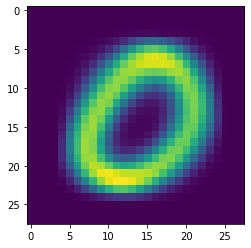

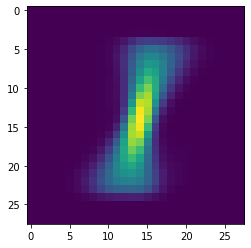

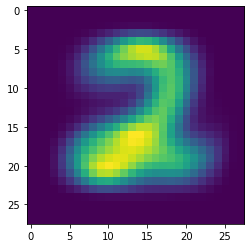

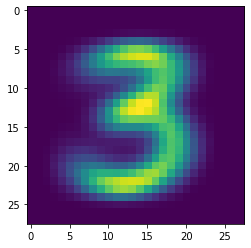

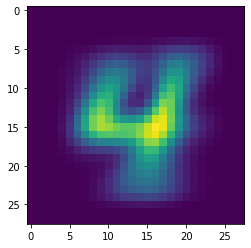

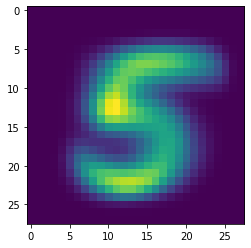

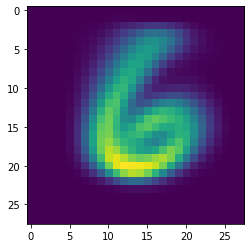

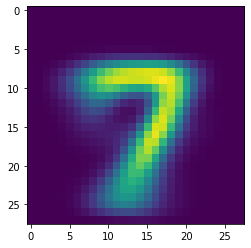

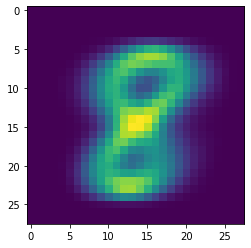

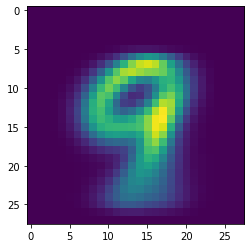

In [5]:
# Fitting all the photos one on top of each other (the averages)

df_groupby = df.groupby('solution').mean()

for i in range(df_groupby.shape[0]):
    image = df_groupby.iloc[i,:]
    image = image.values.reshape(28,28)
    plt.imshow(image)
    plt.show()  

### Question 2a:

Fit a logistic regression model to this data with its solver set to be the 'lbfgs' algorithm. (You can try using other solvers if you’d like, but this is one of the fastest ones.)<br>

a) Reduce the dimensionality of your data using Principal Component Analysis.

In [6]:
# Define the variables
from sklearn import preprocessing
from sklearn.decomposition import PCA

# To reduce the running time for question 2 we decided to take just 10% of the data.
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, train_size=0.06, test_size=0.04, stratify = y, random_state = 1)

In [7]:
# Fitting a Logistic model to my data.

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=10000)
log_reg.fit(X_train_10, y_train_10)
log_reg.score(X_test_10, y_test_10)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.855

Text(0.5, 1.0, 'PCA')

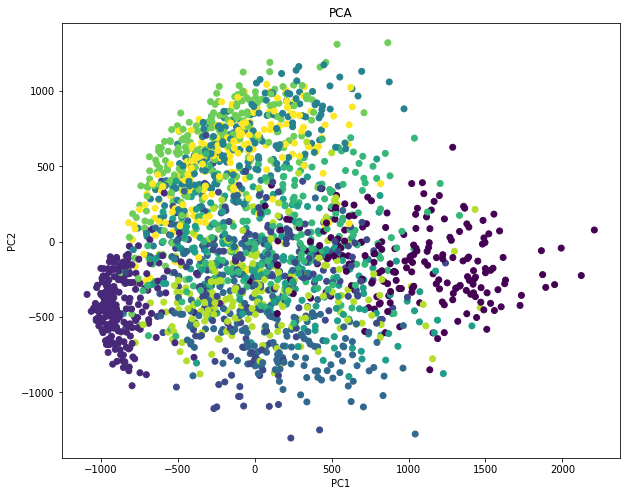

In [8]:
# Use PCA to reduce the dimensionality
# It is hard to visualise anything with the PCA so we also use TSNE bellow.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

plt.figure(figsize=(10,8))
my_pca = PCA().fit(X_train_10)

# Should this part not be on the test data?
x = my_pca.transform(X_train_10)
plt.scatter(x[:,0], x[:,1], c=y_train_10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')



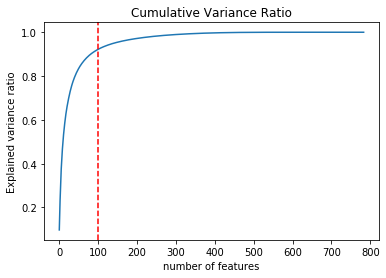

In [9]:
# Create labels for each bar
length = len(my_pca.explained_variance_ratio_)
principal_components = [i for i in np.arange(length)]

x = 0
cumulative_var_ratio = []
for var in my_pca.explained_variance_ratio_[0:length]:
    x += var
    cumulative_var_ratio.append(x)


# Plot the explained variance ratio for each PC
plt.plot(principal_components, cumulative_var_ratio)
plt.axvline(x=100 , color='r', linestyle='--')
plt.ylabel('Explained variance ratio')
plt.xlabel('number of features')
plt.title('Cumulative Variance Ratio')

plt.show()

As expected the cumulative variance ratio for the PCA converges towards 1. I decided to reduce the number of features in my model to 100, as it doesn't seem to improve much after this point. 

In [10]:
my_pca = PCA(n_components = 100).fit(X_train_10)
x = my_pca.transform(X_train_10)

Using the TSNE we can visually see that there are clear patterns in our data.

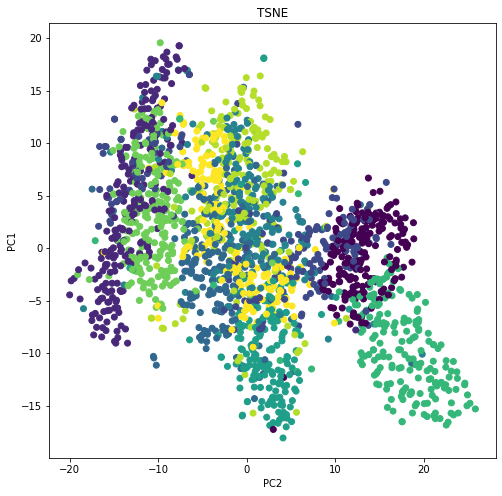

In [11]:
# Having a look our model using at TSNE

from sklearn.manifold import TSNE

# Instantiate & fit PCA model
my_tsn = TSNE(n_components=3)

# transform data onto the first two principal components
x = my_tsn.fit_transform(X_train_10)

plt.figure(figsize=(8, 8))
plt.scatter(x[:,0],x[:,1],c=y_train_10)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title('TSNE')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

### Question 2b:

What does reducing the dimensionality do to the computation time and why? What does reducing the number of data points do to the computation time and why?

In [12]:
# function to run a logistic regression on my model
# dim is the dimentions, and size is the fraction of data points (between 0 and 1).

import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


def log_reg(X, y, dim, size):  

    # Define the train and test samples and their size
    train_size = size*0.6
    test_size = size*0.4
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, stratify = y, random_state = 1)                                      

    # Define the train and test samples and their size
    my_pca = PCA(n_components = dim).fit(X_train)
    X_train = my_pca.transform(X_train)
    X_test = my_pca.transform(X_test)
    
    #Find the cumulative variance ratio
    cumulative_var_ratio = my_pca.explained_variance_ratio_.sum()

    #Starting the timer to calculate the time my logistic regression takes to run.
    time1 = time.time()
    
    #Logistic Regression()
    log_reg = LogisticRegression(multi_class='auto', penalty='l2', C=0.01, solver='lbfgs', max_iter=1000)
    log_reg.fit(X_train,y_train)
    score = log_reg.score(X_test,y_test)
    
    #calculate time difference
    time2 = time.time()
    time_diff = time2 - time1
    
    return cumulative_var_ratio, time_diff, score    


In [13]:
# A function to look at how run time is affected by the number of dimentions our moeld has.

cum_var_ratio = []
time_diff = []
score = []
dim = []
for i in range(1, X_train.shape[1], 50):
   
    # runs our logistic regression
    lr = log_reg(X, y, i, 1)
    
    # saves variables
    dim.append(i)
    cum_var_ratio.append(lr[0])
    time_diff.append(lr[1])
    score.append(lr[2])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//ana

In [14]:
# Create a DF to compare more acurately:
df_dim = pd.DataFrame({'dim':dim, 'cum_var_ratio':cum_var_ratio, 'time_diff':time_diff, 'score':score} )
df_dim

dim  cum_var_ratio  time_diff     score
0     1       0.096684   1.133682  0.304929
1    51       0.828993   4.909404  0.905214
2   101       0.916093   5.627445  0.916857
3   151       0.949130   6.481824  0.915929
4   201       0.966844   7.308812  0.910286
5   251       0.978436   8.245193  0.909071
6   301       0.986480   9.195979  0.904286
7   351       0.992176  10.051128  0.896714
8   401       0.995996  12.383068  0.890714
9   451       0.998201  13.478279  0.883071
10  501       0.999315  14.795865  0.878500
11  551       0.999802  15.413114  0.874214
12  601       0.999962  16.433183  0.872000
13  651       0.999999  17.663367  0.872500
14  701       1.000000  18.648724  0.871714
15  751       1.000000  20.031626  0.872643

From the table above above and the graph bellow we can see that the time it takes to run the logistic regression increases linearly (on average) as we have more features. 

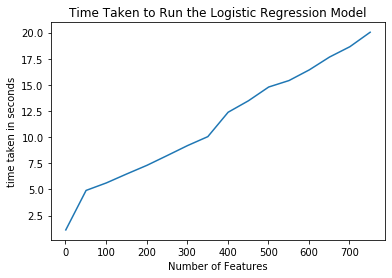

In [15]:
# Plot the explained variance ratio for each PC
plt.plot(df_dim['dim'], df_dim['time_diff'])
plt.ylabel('time taken in seconds')
plt.xlabel('Number of Features')
plt.title('Time Taken to Run the Logistic Regression Model')
plt.show()

 What does reducing the number of data points do to the computation time and why?

In [16]:
# A function that look at how the run time is affected by the number of datapoits in our model.

cum_var_ratio = []
time_diff = []
score = []
datap = []

a = np.array(range(1, 100, 5)) / 100

for i in a:
    # runs our linear model
    lr = log_reg(X, y, 100, i)
    
    # saves variables  
    cum_var_ratio.append(lr[0])
    time_diff.append(lr[1])
    score.append(lr[2])
    datap.append(i)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//ana

In [17]:
df_datap = pd.DataFrame({'number of datapoints':datap, 'cum_var_ratio':cum_var_ratio, 'time_diff':time_diff, 'score':score} )    
df_datap

number of datapoints  cum_var_ratio  time_diff     score
0                   0.01       0.966898   0.046508  0.785714
1                   0.06       0.924405   0.601294  0.828571
2                   0.11       0.920514   0.860950  0.833225
3                   0.16       0.918532   1.120733  0.831250
4                   0.21       0.917635   1.440960  0.868027
5                   0.26       0.916809   1.741979  0.877506
6                   0.31       0.916432   1.994516  0.891244
7                   0.36       0.916069   2.251316  0.896230
8                   0.41       0.915757   2.494735  0.898606
9                   0.46       0.915637   2.771202  0.901568
10                  0.51       0.915443   3.066392  0.903095
11                  0.56       0.915387   3.290316  0.906262
12                  0.61       0.915246   3.593229  0.905738
13                  0.66       0.915230   3.856484  0.907900
14                  0.71       0.915229   4.077754  0.911771
15                  0.76       0.915199   4.392005  0.911662
16                  0.81       0.915241   4.580312  0.913941
17                  0.86       0.915110   4.830607  0.914957
18                  0.91       0.915132   5.169985  0.913900
19                  0.96       0.915102   5.364301  0.913765

From the table above and the graph bellow, we see that an increase in the number of data points also increases the run time.

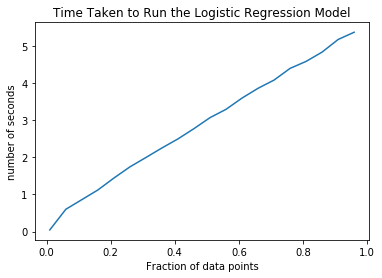

In [18]:
# Plot the explained variance ratio for each PC

plt.plot(df_datap['number of datapoints'], df_datap['time_diff'])
#plt.axvline(x=100 , color='r', linestyle='--')
plt.ylabel('number of seconds')
plt.xlabel('Fraction of data points')
plt.title('Time Taken to Run the Logistic Regression Model')

plt.show()

### Question 2c:

List one advantage and disadvantage of reducing dimensionality. List one advantage and disadvantage of reducing the number of data points:<br>

The advantage for reducing dimensionality as well as reducing the number of data points is that it reduces the running time. 
<br>

One disadvantage of reducing the dimensionality is that it becomes much harder to interpret than if we just used the original independent variables. Additionally reducing the number or dimensions may reduce part of the the variance and how good our final model may be.<br>


A disadvantage of reducing the number of data points is that the anomalies in the segmented data will affect our results more significantly. We may lose some of the meaningful variance in our data.


### Question 3a:

Train two KNN classifiers to model the data: one where K=1 and one where K=the number of training points. For each model, evaluate its accuracy on the training set and on the test set.
Can you explain the results you see?

Bellow we have tested our model for K = 1, 5 and the number of trainings points. When k = 1 we go all the way down each tree until we reach the leaf (terminal node) where we can't split it any more. Thus on the train set, the accuracy will always be equal to 100% as its the data the model was trained on. Normally having k = 1 will over fit our model. The test data is surprisingly good (96.3%) given how much we would usually expect such a model to over fit. The test set which gives us our accuracy score will normally be bellow our training data as it's data that the model hasn't seen before.


When K = the number of training points, the model will only split once. That is it will only have 2 leafs. Here we have the opposite problem, where much of the interpretation is lost. It should be noted that the accuracy score for both the training and the test data is very similar in this case. This is because as poor as it is at predicting it isn't over fitting our model.



In [19]:
#Define the variables
from sklearn.neighbors import KNeighborsClassifier

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, train_size=0.06, test_size=0.04, stratify = y, random_state = 1)

In [20]:
KNN_model = KNeighborsClassifier(n_neighbors = 1)
KNN_model.fit(X_train_10,y_train_10)
print(KNN_model.score(X_train_10,y_train_10))
print(KNN_model.score(X_test_10,y_test_10))

1.0
0.915


In [21]:
KNN_model = KNeighborsClassifier(n_neighbors = 5)
print(KNN_model.fit(X_train_10,y_train_10))
print(KNN_model.score(X_train_10,y_train_10))
print(KNN_model.score(X_test_10,y_test_10))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.94
0.9121428571428571


In [22]:
KNN_model = KNeighborsClassifier(n_neighbors = len(y_train))
print(KNN_model.fit(X_train,y_train))
print(KNN_model.score(X_train,y_train))
print(KNN_model.score(X_test,y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21000, p=2,
                     weights='uniform')
0.11038095238095239
0.11035714285714286


### Question 3b:

Based on your results from Question 3a, try to find an ideal number of neighbors for your KNN classifier. For each value of K that you explore, evaluate the accuracy of the model on the training set and on the test set. What seems to be an ideal value for K, and why is it ideal? (Note: This will take a long time computationally.
Some tips:<br>

You can subset the dataset to make it smaller
You can consider ways to reduce the data’s dimensionality
You do not need to explore every possible K-value. You can use your best judgement to find a suitable range of values to explore, but justify your choices.)


In this question, once again we take 10% of our data to reduce the computation time.

Surprisingly our test accuracy is nearly at it's highest when k=1. Nevertheless we choose k = 4 as the accuracy on the test data is a little better at 92.57% compared to 92.43% when k = 1. Additionally choosing K=4 vs K=1 will reduce overfitting of our model.

In [23]:
# saving the accuracy score as the number of dimentions increase

# Once again we just take 10% of our data
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, train_size=0.06, test_size=0.04, stratify = y, random_state = 1)


# Arrays to save our data in
acc_train = []
acc_test = []
K = []


for i in range(1,100):
     
    # Define PCA with k=100 (as chosen above).
    my_pca = PCA(n_components = 100).fit(X_train_10)
    X_train_PCA_10 = my_pca.transform(X_train_10)
    X_test_PCA_10 = my_pca.transform(X_test_10)
    
    # KNN model defined
    KNN_model = KNeighborsClassifier(n_neighbors = i)
    KNN_model.fit(X_train_PCA_10,y_train_10)
    
    # Model accuracy for train and test data.
    acc_train.append(KNN_model.score(X_train_PCA_10,y_train_10))
    acc_test.append(KNN_model.score(X_test_PCA_10,y_test_10))
    K.append(i)
    
df_KNN = pd.DataFrame({'K': K,
                       'Training Accuracy': acc_train,
                       'Test Accuracy': acc_test})


In [24]:

df_KNN.head(10)

K  Training Accuracy  Test Accuracy
0   1           1.000000       0.924286
1   2           0.951429       0.910000
2   3           0.962857       0.920000
3   4           0.949048       0.925714
4   5           0.947619       0.920000
5   6           0.940000       0.913571
6   7           0.934762       0.914286
7   8           0.929524       0.912857
8   9           0.931429       0.905714
9  10           0.927619       0.907857

In [25]:
# To plot our graph using Altair we need to melt our data.

df_KNN_melt = df_KNN.melt(['K'])
df_KNN_melt.head()

K           variable     value
0  1  Training Accuracy  1.000000
1  2  Training Accuracy  0.951429
2  3  Training Accuracy  0.962857
3  4  Training Accuracy  0.949048
4  5  Training Accuracy  0.947619

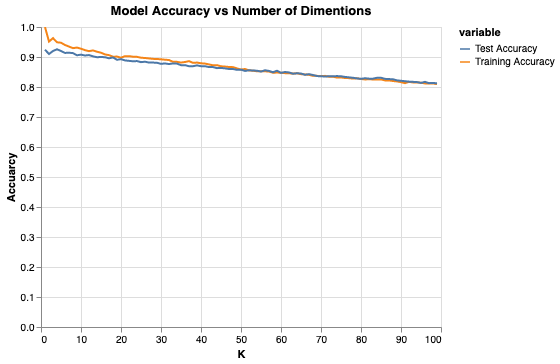

In [26]:
# Plotting the Model Accuracy vs the dimensionality

import altair as alt
alt.renderers.enable('notebook')

chart = alt.Chart(df_KNN_melt, title='Model Accuracy vs Number of Dimentions').mark_line().encode(
    x = 'K',
    y = 'value',
    color = 'variable').interactive()

chart.encoding.y.title = "Accuarcy"
chart

### Question 3c:
Build another model to predict which digit is written, this time using a decision tree. Instead of controlling for the K-value, control for the depth of the tree. Document your model-fitting and model-evaluation process clearly.<br>

Here we look at both the depth of the tree and the number of leafs. From the graph bellow, evaluating our model on our test data, it looks like setting the minimum number of leafs equal to 4 and the max depth equal to 13 gives us our best predictions with an accuracy score of 84.37%.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
#DT_model = DecisionTreeClassifier(max_depth = 3)
#DT_model.fit(X_train, y_train)
#print(DT_model.score(X_train, y_train))
#print(DT_model.score(X_test, y_test))

In [29]:
# Once again we just take 10% of our data
#X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, train_size=0.06, test_size=0.04, stratify = y, random_state = 1)


# This model looks at the predictive power of our model when we change the number of leafs and then max depth.

acc_leaf_2 = []
acc_leaf_4 = []
acc_leaf_6 = []
acc_leaf_8 = []
acc_leaf_10 = []
K = []



for i in range(1,20):
    K.append(i)

    DT_model = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = i)
    DT_model.fit(X_train, y_train)
    acc_leaf_2.append(DT_model.score(X_test, y_test))
    
    DT_model = DecisionTreeClassifier(min_samples_leaf = 4, max_depth = i)
    DT_model.fit(X_train, y_train)
    acc_leaf_4.append(DT_model.score(X_test, y_test))   
 
    DT_model = DecisionTreeClassifier(min_samples_leaf = 6, max_depth = i)
    DT_model.fit(X_train, y_train)
    acc_leaf_6.append(DT_model.score(X_test, y_test))  
    
    DT_model = DecisionTreeClassifier(min_samples_leaf = 8, max_depth = i)
    DT_model.fit(X_train, y_train)
    acc_leaf_8.append(DT_model.score(X_test, y_test))  
    
    DT_model = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = i)
    DT_model.fit(X_train, y_train)
    acc_leaf_10.append(DT_model.score(X_test, y_test))  
    


In [30]:
df_DT = pd.DataFrame({'K': K,
                       'Accuracy with min leaf 2': acc_leaf_2,
                       'Accuracy with min leaf 4': acc_leaf_4,
                       'Accuracy with min leaf 6': acc_leaf_6,
                       'Accuracy with min leaf 8': acc_leaf_8,
                       'Accuracy with min leaf 10': acc_leaf_10,})

df_DT

K  Accuracy with min leaf 2  Accuracy with min leaf 4  \
0    1                  0.197214                  0.197214   
1    2                  0.344000                  0.344000   
2    3                  0.488000                  0.488000   
3    4                  0.576643                  0.576643   
4    5                  0.666929                  0.666929   
5    6                  0.729786                  0.729786   
6    7                  0.776071                  0.776214   
7    8                  0.807429                  0.808214   
8    9                  0.827357                  0.826500   
9   10                  0.836143                  0.836071   
10  11                  0.840643                  0.840714   
11  12                  0.839571                  0.842071   
12  13                  0.841857                  0.843714   
13  14                  0.841714                  0.843500   
14  15                  0.839143                  0.842071   
15  16                  0.841000                  0.840857   
16  17                  0.841143                  0.843357   
17  18                  0.839929                  0.841214   
18  19                  0.842571                  0.843429   

    Accuracy with min leaf 6  Accuracy with min leaf 8  \
0                   0.197214                  0.197214   
1                   0.344000                  0.344000   
2                   0.488000                  0.488000   
3                   0.576643                  0.576643   
4                   0.666929                  0.666929   
5                   0.729786                  0.729786   
6                   0.776143                  0.776143   
7                   0.808214                  0.806429   
8                   0.827786                  0.825857   
9                   0.835714                  0.832286   
10                  0.839786                  0.835786   
11                  0.840500                  0.837857   
12                  0.842500                  0.839643   
13                  0.842071                  0.839857   
14                  0.841571                  0.839643   
15                  0.841071                  0.839286   
16                  0.839357                  0.838571   
17                  0.840929                  0.839357   
18                  0.842143                  0.839786   

    Accuracy with min leaf 10  
0                    0.197214  
1                    0.344000  
2                    0.488000  
3                    0.576643  
4                    0.666929  
5                    0.729786  
6                    0.775786  
7                    0.805714  
8                    0.822929  
9                    0.828286  
10                   0.832929  
11                   0.835643  
12                   0.835857  
13                   0.837214  
14                   0.836786  
15                   0.836000  
16                   0.836571  
17                   0.836857  
18                   0.837214

In [31]:
df_DT = df_DT.melt(['K'])
df_DT

K                   variable     value
0    1   Accuracy with min leaf 2  0.197214
1    2   Accuracy with min leaf 2  0.344000
2    3   Accuracy with min leaf 2  0.488000
3    4   Accuracy with min leaf 2  0.576643
4    5   Accuracy with min leaf 2  0.666929
5    6   Accuracy with min leaf 2  0.729786
6    7   Accuracy with min leaf 2  0.776071
7    8   Accuracy with min leaf 2  0.807429
8    9   Accuracy with min leaf 2  0.827357
9   10   Accuracy with min leaf 2  0.836143
10  11   Accuracy with min leaf 2  0.840643
11  12   Accuracy with min leaf 2  0.839571
12  13   Accuracy with min leaf 2  0.841857
13  14   Accuracy with min leaf 2  0.841714
14  15   Accuracy with min leaf 2  0.839143
15  16   Accuracy with min leaf 2  0.841000
16  17   Accuracy with min leaf 2  0.841143
17  18   Accuracy with min leaf 2  0.839929
18  19   Accuracy with min leaf 2  0.842571
19   1   Accuracy with min leaf 4  0.197214
20   2   Accuracy with min leaf 4  0.344000
21   3   Accuracy with min leaf 4  0.488000
22   4   Accuracy with min leaf 4  0.576643
23   5   Accuracy with min leaf 4  0.666929
24   6   Accuracy with min leaf 4  0.729786
25   7   Accuracy with min leaf 4  0.776214
26   8   Accuracy with min leaf 4  0.808214
27   9   Accuracy with min leaf 4  0.826500
28  10   Accuracy with min leaf 4  0.836071
29  11   Accuracy with min leaf 4  0.840714
..  ..                        ...       ...
65   9   Accuracy with min leaf 8  0.825857
66  10   Accuracy with min leaf 8  0.832286
67  11   Accuracy with min leaf 8  0.835786
68  12   Accuracy with min leaf 8  0.837857
69  13   Accuracy with min leaf 8  0.839643
70  14   Accuracy with min leaf 8  0.839857
71  15   Accuracy with min leaf 8  0.839643
72  16   Accuracy with min leaf 8  0.839286
73  17   Accuracy with min leaf 8  0.838571
74  18   Accuracy with min leaf 8  0.839357
75  19   Accuracy with min leaf 8  0.839786
76   1  Accuracy with min leaf 10  0.197214
77   2  Accuracy with min leaf 10  0.344000
78   3  Accuracy with min leaf 10  0.488000
79   4  Accuracy with min leaf 10  0.576643
80   5  Accuracy with min leaf 10  0.666929
81   6  Accuracy with min leaf 10  0.729786
82   7  Accuracy with min leaf 10  0.775786
83   8  Accuracy with min leaf 10  0.805714
84   9  Accuracy with min leaf 10  0.822929
85  10  Accuracy with min leaf 10  0.828286
86  11  Accuracy with min leaf 10  0.832929
87  12  Accuracy with min leaf 10  0.835643
88  13  Accuracy with min leaf 10  0.835857
89  14  Accuracy with min leaf 10  0.837214
90  15  Accuracy with min leaf 10  0.836786
91  16  Accuracy with min leaf 10  0.836000
92  17  Accuracy with min leaf 10  0.836571
93  18  Accuracy with min leaf 10  0.836857
94  19  Accuracy with min leaf 10  0.837214

[95 rows x 3 columns]

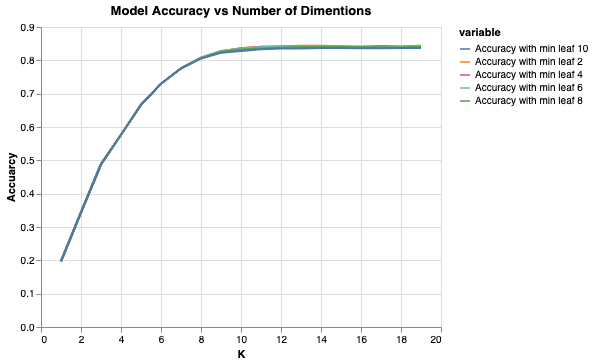

In [32]:
# Flotting the figure onto a graph. 
# As we can see the minimum leaf doesn't impact our results very much

import altair as alt
chart = alt.Chart(df_DT, title='Model Accuracy vs Number of Dimentions').mark_line().encode(
    x = 'K',
    y = 'value',
    color = 'variable').interactive()

chart.encoding.y.title = "Accuarcy"
chart

### Question 4a:
Fit a logistic regression model and use 5-fold cross-validation to optimize its hyperparameters. For each hyperparameter that you’re tuning, describe what it controls in your model. What are the optimal hyperparameters that you found?


In this question we optimized 2 hyperparameters. We compared L1 vs L2 and looked at how changing the penalty 'C' affected our model.


From the table bellow our optimal hyperparameters is to choose L2 with a C value of 1.0e-06 as this give us our optimal mean test accuracy on the validation data (taken 5 times). Finally to get our models accuracy we test it on our test data with the above parameters. This gives us a test accuracy of 88.86%.

In [50]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Step 1: Create remainder text split.

# To reduce the computation time we look at 10% of the data again.
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, train_size=0.06, test_size=0.04, stratify = y, random_state = 1)
penalty = []
scoresL1 = []
scoresL2 = []

# Step 2: Do a logistic regression with a cross test split for each threshold of C 0.001... 1000.
for i in [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]:
    my_logreg_L1 = LogisticRegression(random_state=1, penalty='l1', C=i)
    my_logreg_L2 = LogisticRegression(random_state=1, penalty='l2', C=i)
   
    score_L1 = cross_val_score(my_logreg_L1, X_remainder, y_remainder, cv=5)
    score_L2 = cross_val_score(my_logreg_L2, X_remainder, y_remainder, cv=5)
    
    mean_score_L1 = np.mean(score_L1)
    mean_score_L2 = np.mean(score_L2)

    
    scoresL1.append(mean_score_L1)
    scoresL2.append(mean_score_L2)
    penalty.append(i)
    


In [51]:
df_5_fold_val = pd.DataFrame({'penalty': penalty, 'score_L1': scoresL1, 'score_L2': scoresL2})
df_5_fold_val

penalty  score_L1  score_L2
0  1.000000e-08  0.098570  0.788144
1  1.000000e-07  0.098570  0.842347
2  1.000000e-06  0.098570  0.873255
3  1.000000e-05  0.248603  0.869437
4  1.000000e-04  0.721964  0.843276
5  1.000000e-03  0.850936  0.831903
6  1.000000e-02  0.854644  0.826162
7  1.000000e-01  0.829397  0.820941

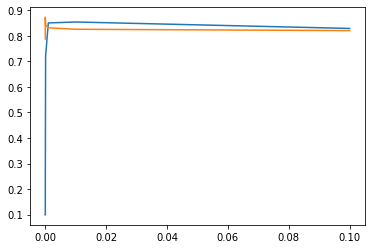

In [52]:
plt.plot(df_5_fold_val['penalty'], df_5_fold_val['score_L1'])
plt.plot(df_5_fold_val['penalty'], df_5_fold_val['score_L2'])
#plt.axvline(x=100 , color='r', linestyle='--')
#plt.ylabel('number of seconds')
plt.show()

The best model is where the penalty is equal to 0.000001

In [53]:
# To calculate our Thus the score is:
my_logreg = LogisticRegression(random_state=1, penalty='l2', C=0.000001)
my_logreg = my_logreg.fit(X_remainder, y_remainder)
print(my_logreg.score(X_test,y_test))

0.8885714285714286


### Question 4b:
What does the confusion matrix look like for your best model? Interpret the confusion matrix. Where is your model strongest and weakest? (Suggestion: Use Seaborn’s sns.heatmap() to plot the confusion matrix with the argument ‘annot=True’.)

As expected the diagonals give us very high numbers. These are all the values for which the model has tested correctly. This is what we would expect as we know our model has an accuracy of 91.4%. We see that there are quite a few errors between the 5s and 8s. We also see these errors between 4s & 9s, 3s & 5s, and 2s & 8s. This is not surprising as each of these pairs of numbers looks quite similar to one another. 5 just misses 2 lines and 4 misses a joint at the top. <br>

Pictures with number 5 have quite a low recall. This tells us that out of the actual pictures with the number 5, 22% of them were wrongly predicted.


In [54]:
# Step 1: Get cunfusion matrix:
from sklearn.metrics import confusion_matrix
y_pred = my_logreg.predict(X_test)
df_con = confusion_matrix(y_test, y_pred)
df_con

array([[130,   0,   1,   1,   1,   1,   3,   0,   1,   0],
       [  0, 151,   1,   0,   0,   1,   0,   0,   1,   0],
       [  0,   5, 116,   5,   3,   0,   1,   0,   9,   0],
       [  2,   2,   3, 121,   0,   9,   0,   2,   5,   0],
       [  0,   2,   2,   0, 124,   0,   1,   0,   1,   7],
       [  2,   2,   0,   6,   2, 101,   2,   1,  12,   1],
       [  1,   0,   0,   0,   2,   2, 131,   0,   1,   1],
       [  0,   2,   1,   2,   2,   0,   0, 134,   0,   7],
       [  0,   3,   1,   2,   4,   3,   2,   1, 116,   4],
       [  0,   1,   3,   3,   3,   1,   0,   4,   2, 120]])

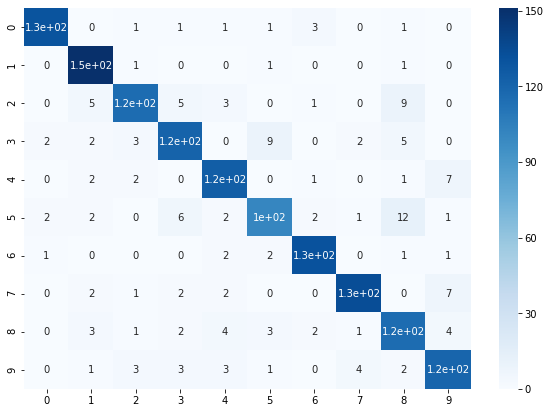

In [55]:
# Create a heatmap using Seaborn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize = (10,7))
sn.heatmap(df_con, annot=True, cmap="Blues")


In [56]:
# Getting the presision and recal values

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       138
         1.0       0.90      0.98      0.94       154
         2.0       0.91      0.83      0.87       139
         3.0       0.86      0.84      0.85       144
         4.0       0.88      0.91      0.89       137
         5.0       0.86      0.78      0.82       129
         6.0       0.94      0.95      0.94       138
         7.0       0.94      0.91      0.92       148
         8.0       0.78      0.85      0.82       136
         9.0       0.86      0.88      0.87       137

    accuracy                           0.89      1400
   macro avg       0.89      0.89      0.89      1400
weighted avg       0.89      0.89      0.89      1400



### Question 4c:
Re-fit a linear model that can discriminate between the digit 4 and the digit 9. Visualize the weights of the model as an image. What can you learn from this image about how your classifier distinguishes 4s from 9s?

The image bellow plots the coefficients for every pixel. Not surprisingly pixels that are on the outside of where the numbers come up, don't help the model predict whether the picture is a 4 or a 9. Therefore all the pixels on the outside are naturally colored all the same. Whiles darker and lighter colors tell us the predictive power of each pixel. The darkest as well as the lightest pixels are the most predictive pixels.

In [57]:
df_49 = df[(df['solution'] == 4) | (df['solution'] == 9)]
X_49 = df_49.iloc[:, :-1]
y_49 = df_49.iloc[:, -1]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_49, y_49, test_size=0.4, stratify = y_49, random_state = 1)

In [59]:
from sklearn.linear_model import LogisticRegression

my_logreg_49 = LogisticRegression()
my_logreg_49.fit(X_train, y_train)
coeff = my_logreg_49.coef_

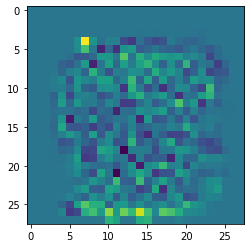

In [60]:
image = coeff.reshape(28,28)
plt.imshow(image)
plt.show()